In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import imblearn as ib
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
data = pd.read_csv("../data/stroke_prediction.csv")

In [3]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
data.drop(columns=["id"], inplace=True)

In [5]:
data.head()


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [6]:
# Check for missing values
data.isnull().sum()


gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [7]:
# Check for duplicates  
data.duplicated().sum()


np.int64(0)

In [8]:
# Check for data types
data.dtypes


gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [9]:
# Check for unique values in categorical columns
data.select_dtypes(include=['object']).nunique()

gender            3
ever_married      2
work_type         5
Residence_type    2
smoking_status    4
dtype: int64

In [11]:
data['gender'].value_counts()

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

gender
Female    2995
Male      2115
Name: count, dtype: int64


<Axes: ylabel='count'>

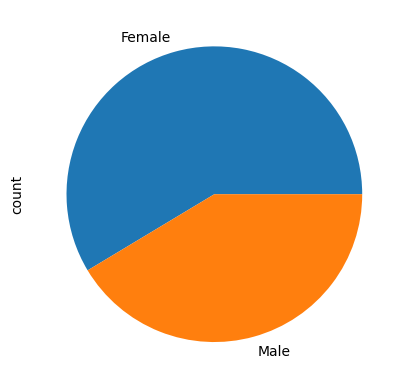

In [15]:
# Removing the 'other' gender instance inorder to reduce the dimension
data['gender'] = data['gender'].replace('Other','Female')

# Check the unique values again
print(data['gender'].value_counts())

# plotting a pie chart to see the gender count distribution
data['gender'].value_counts().plot(kind="pie")

In [17]:
# Stroke value counts where BMI is NaN
data[data['bmi'].isna()]['stroke'].value_counts()


stroke
0    161
1     40
Name: count, dtype: int64

In [19]:
# Drop rows where BMI is NaN and stroke is 0
data = data.drop(data[(data['bmi'].isna()) & (data['stroke'] == 0)].index)


In [20]:
data[data['bmi'].isna()]['stroke'].value_counts()

stroke
1    40
Name: count, dtype: int64

In [21]:
data.shape

(4949, 11)

In [22]:
print(data['gender'].value_counts())

gender
Female    2919
Male      2030
Name: count, dtype: int64
